In [1]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.7429, 0.1041, 0.9219],
        [0.5218, 0.3752, 0.4431],
        [0.8787, 0.2789, 0.0386],
        [0.3010, 0.2011, 0.6003],
        [0.7191, 0.1683, 0.9371]])


In [2]:
import torch

torch.cuda.is_available()

True

# Tutoriales pytorch

## How to load data in pytorch

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
train_data = datasets.FashionMNIST(
    root="../data", train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="../data", train=False, download=True, transform=ToTensor()
)

In [18]:
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape if X [N,C,H,W] {X.shape}")
    print(f"Shape if y {y.shape}")

Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])

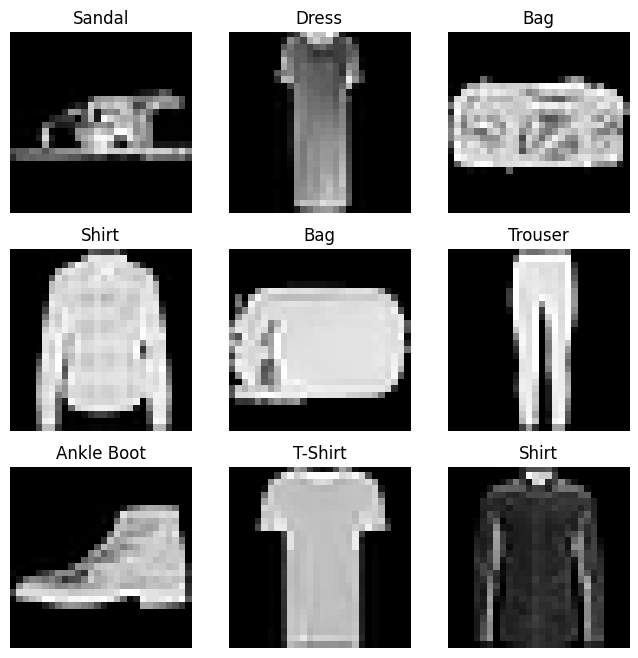

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
import os
import pandas as pd
from torchvision.io import decode_image
from torch.utils.data import Dataset

# Para no gastar memoria por ejemplo se recomienda cargar imagen por imagen las imagenes del dataset, asegurandonos que la memoria no se llene.
class CustomImageDataset(Dataset):
    # Esto se crea la primera vez que creamos el init este solo se ejecuta la primera vez que instanciamos la clase
    def __init__(
        self, annotations_file, img_dir, transform=None, target_transform=None
    ):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # El returna el numero de elementos que tenemos
    def __len__(self):
        return len(self.img_labels)

    # El get item retorna un elemento en un indice especifico
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


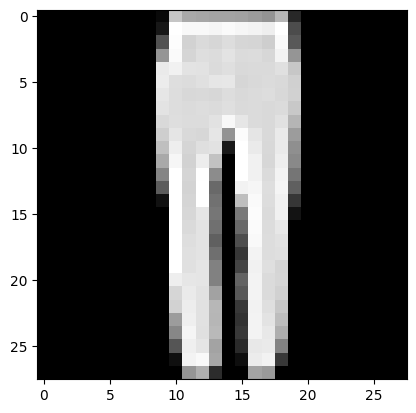

Label: 1


In [10]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Creating Models 

In [15]:
device = (
    torch.accelerator.current_accelerator().type
    if torch.accelerator.is_available()
    else "cpu"
)
print(f"Using {device} device")


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):  
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # No se pone softmax porque la funcion de perdida ya lo calcula y si se pusiera estariamos aplicando dos veces softmax
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Using cuda device


In [16]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [20]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
train_dataloader

In [17]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')
